<a href="https://colab.research.google.com/github/dropthejase/ml_training/blob/main/neural_networks/ann_ecoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/ecoli.csv

--2023-01-26 00:21:15--  https://lazyprogrammer.me/course_files/exercises/ecoli.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19487 (19K) [text/csv]
Saving to: ‘ecoli.csv’

ecoli.csv           100%[===================>]  19.03K  --.-KB/s    in 0s      

2023-01-26 00:21:15 (107 MB/s) - ‘ecoli.csv’ saved [19487/19487]



In [ ]:
df = pd.read_csv('ecoli.csv', header=None)
df.values
df.shape

(336, 1)

In [ ]:
df1 = df[0].str.split('  ', expand=True)
df2 = df1.fillna(value=np.nan)

,0,1,2,3,4,5,6,7,8,9
0,AAT_ECOLI,0.49,0.29,0.48,0.50,0.56,0.24,0.35,cp,NaN
1,ACEA_ECOLI,0.07,0.40,0.48,0.50,0.54,0.35,0.44,cp,NaN
2,ACEK_ECOLI,0.56,0.40,0.48,0.50,0.49,0.37,0.46,cp,NaN
3,ACKA_ECOLI,0.59,0.49,0.48,0.50,0.52,0.45,0.36,cp,NaN
4,ADI_ECOLI,0.23,0.32,0.48,0.50,0.55,0.25,0.35,cp,NaN
...,...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.50,0.47,0.68,0.30,pp,NaN
332,UGPB_ECOLI,0.71,0.57,0.48,0.50,0.48,0.35,0.32,pp,NaN
333,USHA_ECOLI,0.61,0.60,0.48,0.50,0.44,0.39,0.38,pp,NaN
334,XYLF_ECOLI,0.59,0.61,0.48,0.50,0.42,0.42,0.37,pp,NaN


In [ ]:
df2[9] = df2[9].str.strip()
df2[9].unique()

df2[df2[9] == 'cp'].index[0]

47

In [ ]:
name = df2[df2[9] == 'cp'].iloc[:,0]

In [ ]:
row = df2[df2[9] == 'cp'].shift(periods=-1,axis=1)
row.iloc[:,0] = name

row

,0,1,2,3,4,5,6,7,8,9
47,GT_ECOLI,0.43,0.40,0.48,0.50,0.39,0.28,0.39,cp,NaN


In [ ]:
df2.iloc[47] = row
df3 = df2.drop(9, axis=1)

In [ ]:
df3 = df3.set_index([0])

In [ ]:
df3.iloc[:,:7] = df3.iloc[:,:7].astype('float')

In [ ]:
df3[8] = df3[8].str.strip()

In [ ]:
data = df3.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,1,2,3,4,5,6,7,8
0,0.75,0.84,0.48,0.5,0.35,0.52,0.33,pp
1,0.73,0.84,0.48,0.5,0.86,0.58,0.29,om
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.54,0.49,0.48,0.5,0.40,0.87,0.88,im
4,0.68,0.63,0.48,0.5,0.73,0.40,0.30,om
...,...,...,...,...,...,...,...,...
331,0.20,0.46,0.48,0.5,0.57,0.78,0.81,im
332,0.25,0.40,0.48,0.5,0.47,0.33,0.42,cp
333,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
334,0.75,0.55,1.00,1.0,0.40,0.47,0.30,imL


In [ ]:
data[8].unique()

array(['pp', 'om', 'cp', 'im', 'imU', 'omL', 'imS', 'imL'], dtype=object)

In [ ]:
test = pd.Categorical(data[8])
test.codes
data[8] = test.codes
data

,1,2,3,4,5,6,7,8
0,0.75,0.84,0.48,0.5,0.35,0.52,0.33,7
1,0.73,0.84,0.48,0.5,0.86,0.58,0.29,5
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.54,0.49,0.48,0.5,0.40,0.87,0.88,1
4,0.68,0.63,0.48,0.5,0.73,0.40,0.30,5
...,...,...,...,...,...,...,...,...
331,0.20,0.46,0.48,0.5,0.57,0.78,0.81,1
332,0.25,0.40,0.48,0.5,0.47,0.33,0.42,0
333,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
334,0.75,0.55,1.00,1.0,0.40,0.47,0.30,2


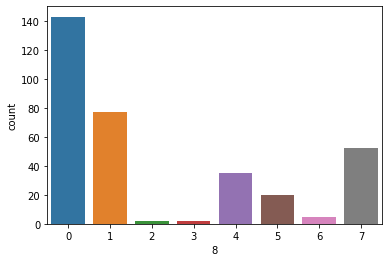

In [ ]:
import seaborn as sns

sns.countplot(x=data[8])

**TRAIN TEST SPLIT AND STANDARDISE**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(8, axis=1).values
y = data[8].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [ ]:
Train = torch.hstack((X_train, y_train.reshape(-1,1)))
Test = torch.hstack((X_test, y_test.reshape(-1,1)))

In [ ]:
# Creating our dataset class
class E_coli(torch.utils.data.Dataset):    
    # Constructor
    def __init__(self, dataset):
        self.x = dataset[:,:7]
        self.y = dataset[:,7].type(torch.LongTensor)
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

In [ ]:
train_dataset = E_coli(Train)
test_dataset = E_coli(Test)

In [ ]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

tensor([0, 7, 2, 0, 0, 3, 1, 0, 0, 4, 0, 0, 1, 4, 1, 7, 0, 4, 0, 5, 0, 0, 0, 5,
        0, 1, 1, 6, 7, 0, 1, 1, 0, 0, 0, 7, 1, 5, 0, 4, 5, 0, 7, 0, 3, 0, 1, 0,
        0, 4])
tensor([0, 0, 0, 0, 0, 7, 1, 7, 4, 0, 0, 7, 0, 1, 0, 0, 7, 5, 0, 1, 7, 4, 0, 5,
        4, 0, 0, 1, 0, 5, 1, 0, 1, 7, 1, 7, 7, 0, 1, 4, 0, 6, 7, 7, 1, 0, 1, 0,
        1, 4])
tensor([6, 1, 0, 0, 1, 0, 0, 2, 0, 7, 7, 7, 7, 1, 0, 7, 4, 4, 1, 0, 4, 1, 0, 1,
        1, 1, 7, 1, 1, 0, 7, 1, 7, 7, 5, 7, 0, 1, 7, 1, 0, 7, 0, 0, 0, 0, 0, 0,
        0, 0])
tensor([7, 0, 1, 0, 7, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 4, 1, 7, 1, 1, 0, 5,
        0, 5, 7, 1, 7, 4, 1, 5, 0, 7, 0, 0, 0, 1, 0, 0, 1, 0, 0, 7, 4, 5, 0, 1,
        1, 0])
tensor([1, 0, 0, 4, 4, 7, 4, 0, 1, 7, 7, 0, 1, 7, 0, 5, 5, 0, 0, 4, 0, 0, 0, 0,
        0, 0, 1, 4, 0, 1, 0, 1, 7, 4, 1, 5, 5, 0, 0, 4, 0, 7, 1, 0, 1, 0, 5, 1,
        7, 7])
tensor([7, 0, 4, 1, 0, 7, 7, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0, 1])


**BUILD THE MODEL**

In [ ]:
N = X_train.shape[0]
K = len(np.unique(y_train))

In [ ]:
# Build the model
model = nn.Sequential(
    nn.Linear(7,128),
    nn.ReLU(),
    nn.Linear(128,K)
)

In [ ]:
# Basically uses GPU, which is called 'cuda:0'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=7, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=8, bias=True)
)

In [ ]:
# Loss and optimiser
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters())

In [ ]:
n_epochs = 50

In [ ]:
# To store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  test_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    model.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    opt.step()

    train_loss.append(loss.item())
  
  train_loss = np.mean(train_loss)

  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    opt.step()

    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  # save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f"Epoch: {it+1} / Train Loss: {train_loss: .4f} / Test Loss: {test_loss: .4f}")

Epoch: 1 / Train Loss:  2.0156 / Test Loss:  1.8718
Epoch: 2 / Train Loss:  1.7447 / Test Loss:  1.6136
Epoch: 3 / Train Loss:  1.5393 / Test Loss:  1.3950
Epoch: 4 / Train Loss:  1.3197 / Test Loss:  1.2108
Epoch: 5 / Train Loss:  1.1771 / Test Loss:  1.0549
Epoch: 6 / Train Loss:  1.0200 / Test Loss:  0.9261
Epoch: 7 / Train Loss:  0.8984 / Test Loss:  0.8182
Epoch: 8 / Train Loss:  0.8273 / Test Loss:  0.7298
Epoch: 9 / Train Loss:  0.7320 / Test Loss:  0.6601
Epoch: 10 / Train Loss:  0.7308 / Test Loss:  0.6013
Epoch: 11 / Train Loss:  0.6356 / Test Loss:  0.5529
Epoch: 12 / Train Loss:  0.6118 / Test Loss:  0.5124
Epoch: 13 / Train Loss:  0.5762 / Test Loss:  0.4793
Epoch: 14 / Train Loss:  0.5487 / Test Loss:  0.4483
Epoch: 15 / Train Loss:  0.4998 / Test Loss:  0.4188
Epoch: 16 / Train Loss:  0.5022 / Test Loss:  0.3981
Epoch: 17 / Train Loss:  0.5083 / Test Loss:  0.3836
Epoch: 18 / Train Loss:  0.4970 / Test Loss:  0.3694
Epoch: 19 / Train Loss:  0.4352 / Test Loss:  0.3546
Ep

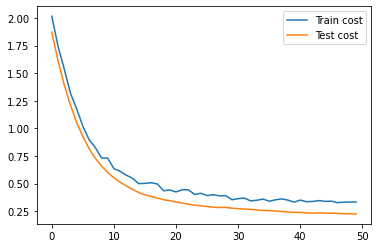

In [ ]:
plt.plot(train_losses, label='Train cost')
plt.plot(test_losses, label='Test cost')
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # forward
  pY_train = model(inputs)

  # get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(pY_train, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0

for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # forward
  pY_test = model(inputs)

  # get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(pY_test, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train Accuracy: {train_acc: .4f} / Test Accuracy: {test_acc: .4f}")

Train Accuracy:  0.8731 / Test Accuracy:  0.9118


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

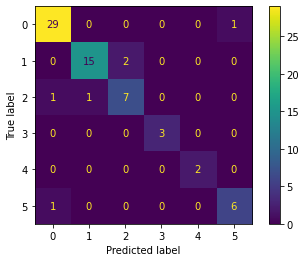

In [ ]:
p_test = np.array([])

for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # forward
  pY_test = model(inputs)

  # get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(pY_test, 1)

  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()